In [ ]:
#Adi Gumelar_CV A_Batch 6

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 44.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ultralytics
import cv2
import random
import os
from PIL import Image
from ultralytics import YOLO
from IPython.display import display
from glob import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
#setup variables
num_samples = 16
src_yamlfile='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/data.yaml'
src_image_train='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/train/images/*'
src_image_test='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/test/images'
src_image_valid='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/valid/images'

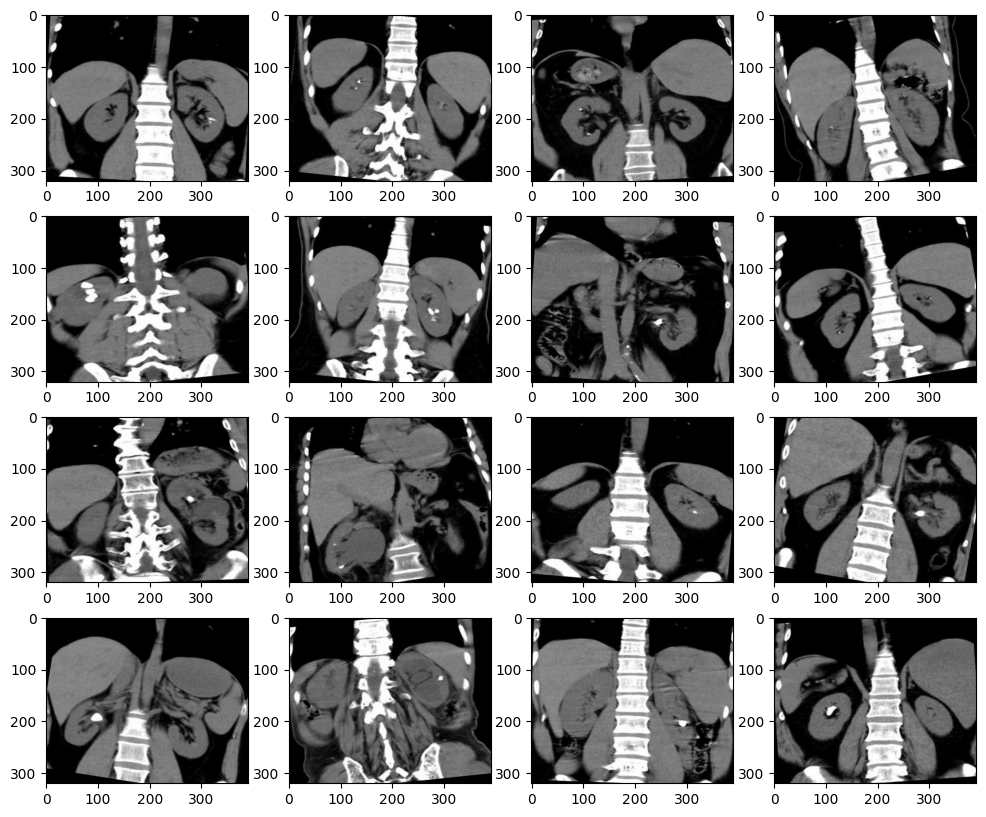

In [5]:
images_train = glob(src_image_train)
random_image = random.sample(images_train, num_samples)

plt.figure(figsize=(12,10))
for i in range(num_samples):
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('on')

In [7]:
# Choosing Yolov8
yolo_v8 = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:01<00:00, 49.8MB/s]


In [8]:
num_epochs=50
batch_size=10
num_seed = 6
learning_rate = 0.001
optimizer = 'Adam'
num_worker = 2

model_yolov8 = yolo_v8.train(data=src_yamlfile, seed=num_seed, epochs=num_epochs, lr0=learning_rate, workers=num_worker, optimizer=optimizer, verbose=True, project='KidneyStone_yolov8m',name='yolo_v8')

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=KidneyStone_yolov8m, name=yolo_v8, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

100%|██████████| 755k/755k [00:00<00:00, 106MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 132MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to KidneyStone_yolov8m/yolo_v8/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to KidneyStone_yolov8m/yolo_v8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.92G      2.251      2.732      1.348         40        640: 100%|██████████| 66/66 [00:38<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]

                   all        123        325      0.596      0.412      0.426      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.83G      2.111      1.202      1.278         47        640: 100%|██████████| 66/66 [00:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        123        325       0.65      0.566      0.503      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.75G      2.097      1.179      1.294         41        640: 100%|██████████| 66/66 [00:35<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        123        325      0.558      0.557      0.438      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.81G      2.107      1.186      1.317         48        640: 100%|██████████| 66/66 [00:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        123        325      0.746      0.622      0.651      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.85G      2.071      1.138      1.271         48        640: 100%|██████████| 66/66 [00:36<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        123        325      0.689      0.614      0.617      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.82G      2.061      1.104      1.297         38        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        123        325      0.667      0.606      0.596       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.85G      2.056       1.08       1.28         51        640: 100%|██████████| 66/66 [00:37<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        123        325      0.718      0.673      0.654      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.84G      2.025      1.068      1.275         71        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        123        325      0.666      0.625      0.636      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.83G      2.016      1.043      1.254         41        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        123        325      0.756      0.674      0.687      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.82G      1.993      1.026      1.242         40        640: 100%|██████████| 66/66 [00:36<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        123        325      0.718      0.579      0.641       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.84G      1.999       1.04      1.254         44        640: 100%|██████████| 66/66 [00:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325       0.74      0.622      0.647      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.85G      1.985      1.009       1.25         49        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325      0.756      0.655      0.668      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.85G      1.965     0.9974      1.241         37        640: 100%|██████████| 66/66 [00:38<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        123        325      0.746      0.643      0.708      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.81G      1.954      1.007      1.221         58        640: 100%|██████████| 66/66 [00:37<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325      0.802      0.684      0.721      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.86G      1.931     0.9689      1.247         27        640: 100%|██████████| 66/66 [00:37<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325      0.762      0.649      0.701      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.81G      1.943     0.9718      1.239         40        640: 100%|██████████| 66/66 [00:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        123        325      0.737      0.698      0.724      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.83G      1.936     0.9783      1.236         51        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        123        325      0.782      0.619      0.653      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.86G      1.897     0.9292      1.206         46        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        123        325      0.736      0.649      0.683      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.84G      1.909     0.9275      1.199         36        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        123        325      0.732      0.717      0.721      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.81G      1.873     0.9096      1.211         41        640: 100%|██████████| 66/66 [00:37<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        123        325      0.777      0.732       0.77      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.86G      1.855     0.9011      1.193         48        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        123        325      0.763      0.702      0.706      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.85G      1.848     0.8954      1.185         36        640: 100%|██████████| 66/66 [00:37<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        123        325      0.742      0.714      0.737      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.82G      1.876     0.9052      1.174         44        640: 100%|██████████| 66/66 [00:36<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.795      0.692      0.735      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.81G      1.801     0.8864      1.187         65        640: 100%|██████████| 66/66 [00:37<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        123        325      0.742      0.695      0.716      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.84G      1.809     0.8846      1.158         44        640: 100%|██████████| 66/66 [00:37<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325      0.774      0.708      0.735      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.86G      1.854       0.88      1.181         54        640: 100%|██████████| 66/66 [00:38<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        123        325      0.772      0.711       0.73      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.86G      1.835     0.8959      1.156         55        640: 100%|██████████| 66/66 [00:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.768      0.725      0.755      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       6.8G      1.794     0.8541      1.135         21        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        123        325      0.805       0.71      0.752      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.83G      1.791     0.8509      1.159         34        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        123        325      0.784      0.702      0.745      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.81G      1.767     0.8232      1.162         33        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        123        325      0.755      0.726      0.756      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.84G      1.794      0.834      1.154         55        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        123        325      0.813      0.717      0.779      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.83G      1.731     0.8043      1.119         41        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        123        325      0.788      0.702      0.727      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.85G      1.692     0.7859      1.131         58        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325       0.78        0.7      0.716      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.82G      1.696     0.7748      1.118         30        640: 100%|██████████| 66/66 [00:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325      0.791      0.702      0.765       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.85G      1.721     0.7849      1.132         42        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        123        325      0.762      0.738      0.776      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.85G      1.703     0.7819      1.111         44        640: 100%|██████████| 66/66 [00:36<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        123        325      0.789      0.712       0.75      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.86G      1.648      0.759      1.108         67        640: 100%|██████████| 66/66 [00:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        123        325      0.827      0.735       0.78       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.82G      1.649     0.7522      1.102         53        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        123        325      0.805      0.698      0.749      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.85G      1.618     0.7295      1.085         69        640: 100%|██████████| 66/66 [00:37<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        123        325      0.778       0.71      0.733      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.81G      1.639     0.7443      1.089         62        640: 100%|██████████| 66/66 [00:38<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        123        325      0.775      0.709      0.714      0.279


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.84G      1.612     0.7165      1.107         18        640: 100%|██████████| 66/66 [00:37<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        123        325      0.805      0.699       0.73        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       6.8G      1.577     0.7157      1.106         28        640: 100%|██████████| 66/66 [00:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        123        325      0.771      0.692      0.743      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.83G      1.591     0.7023      1.107         31        640: 100%|██████████| 66/66 [00:36<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.771      0.754      0.763      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.81G      1.556     0.6908      1.108         27        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325      0.754      0.745      0.766      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.83G      1.547     0.6967       1.09         26        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325       0.83      0.698      0.778       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.82G      1.495     0.6608      1.068         30        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        123        325      0.729      0.745      0.748      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.86G      1.491     0.6506       1.07         32        640: 100%|██████████| 66/66 [00:37<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325      0.789      0.759      0.783      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.81G      1.502     0.6435      1.062         23        640: 100%|██████████| 66/66 [00:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        123        325       0.75      0.775      0.772       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.84G      1.469     0.6472      1.044         29        640: 100%|██████████| 66/66 [00:36<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        123        325      0.763      0.745      0.749      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.82G       1.45     0.6329      1.052         24        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.772       0.76      0.789      0.341



50 epochs completed in 0.568 hours.
Optimizer stripped from KidneyStone_yolov8m/yolo_v8/weights/last.pt, 52.0MB
Optimizer stripped from KidneyStone_yolov8m/yolo_v8/weights/best.pt, 52.0MB

Validating KidneyStone_yolov8m/yolo_v8/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


                   all        123        325       0.77       0.76      0.789      0.341
Speed: 0.2ms preprocess, 8.9ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to KidneyStone_yolov8m/yolo_v8


In [9]:
def kidneystone_detection(img_path, model):
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img

def show_single_image(img_file, model_trained):
    # Load the current image and run object detection
    detect_img = kidneystone_detection(img_file, model_trained)

    # Create a figure and axis for a single image
    fig, ax = plt.subplots(figsize=(5,5))

    # Plot the current image
    ax.imshow(detect_img)
    ax.axis('off')

    plt.show()

def show_train_and_validation_graphs(result):
    result.columns = result.columns.str.strip()

    epoch_column = result['epoch']
    box_train_losses = result['train/box_loss']
    box_val_losses = result['val/box_loss']
    cls_train_losses = result['train/cls_loss']
    cls_val_losses = result['val/cls_loss']
    dfl_train_losses = result['train/dfl_loss']
    dfl_val_losses = result['val/dfl_loss']

    plt.figure(figsize=(20,10))
    plt.style.use('ggplot')
    plt.subplot(1,3,1)
    plt.plot(epoch_column, box_train_losses, label='train_loss')
    plt.plot(epoch_column, box_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Box Losses')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(epoch_column, cls_train_losses, label='train_loss')
    plt.plot(epoch_column, cls_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Class Losses')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(epoch_column, dfl_train_losses, label='train_loss')
    plt.plot(epoch_column, dfl_val_losses, label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Distribution Focal Loss')
    plt.title('Train and Validation Distribution Focal Losses (OM/OO)')
    plt.legend()
    plt.show()

In [10]:
df_testing = os.listdir(src_image_test)

In [11]:
selected_images = random.sample(df_testing, 16)

In [12]:
model_yolov8_trained = YOLO('/content/KidneyStone_yolov8m/yolo_v8/weights/best.pt')


0: 544x640 1 Tas_Var, 47.6ms
Speed: 3.0ms preprocess, 47.6ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 37.0ms
Speed: 3.3ms preprocess, 37.0ms inference, 3.8ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 35.2ms
Speed: 5.8ms preprocess, 35.2ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 36.2ms
Speed: 3.4ms preprocess, 36.2ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 35.1ms
Speed: 3.1ms preprocess, 35.1ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 35.1ms
Speed: 3.1ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 35.1ms
Speed: 3.4ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 4 Tas_Vars, 30.3ms
Speed: 3.2ms preprocess, 30.3ms inference, 4.2ms postprocess per image at shape

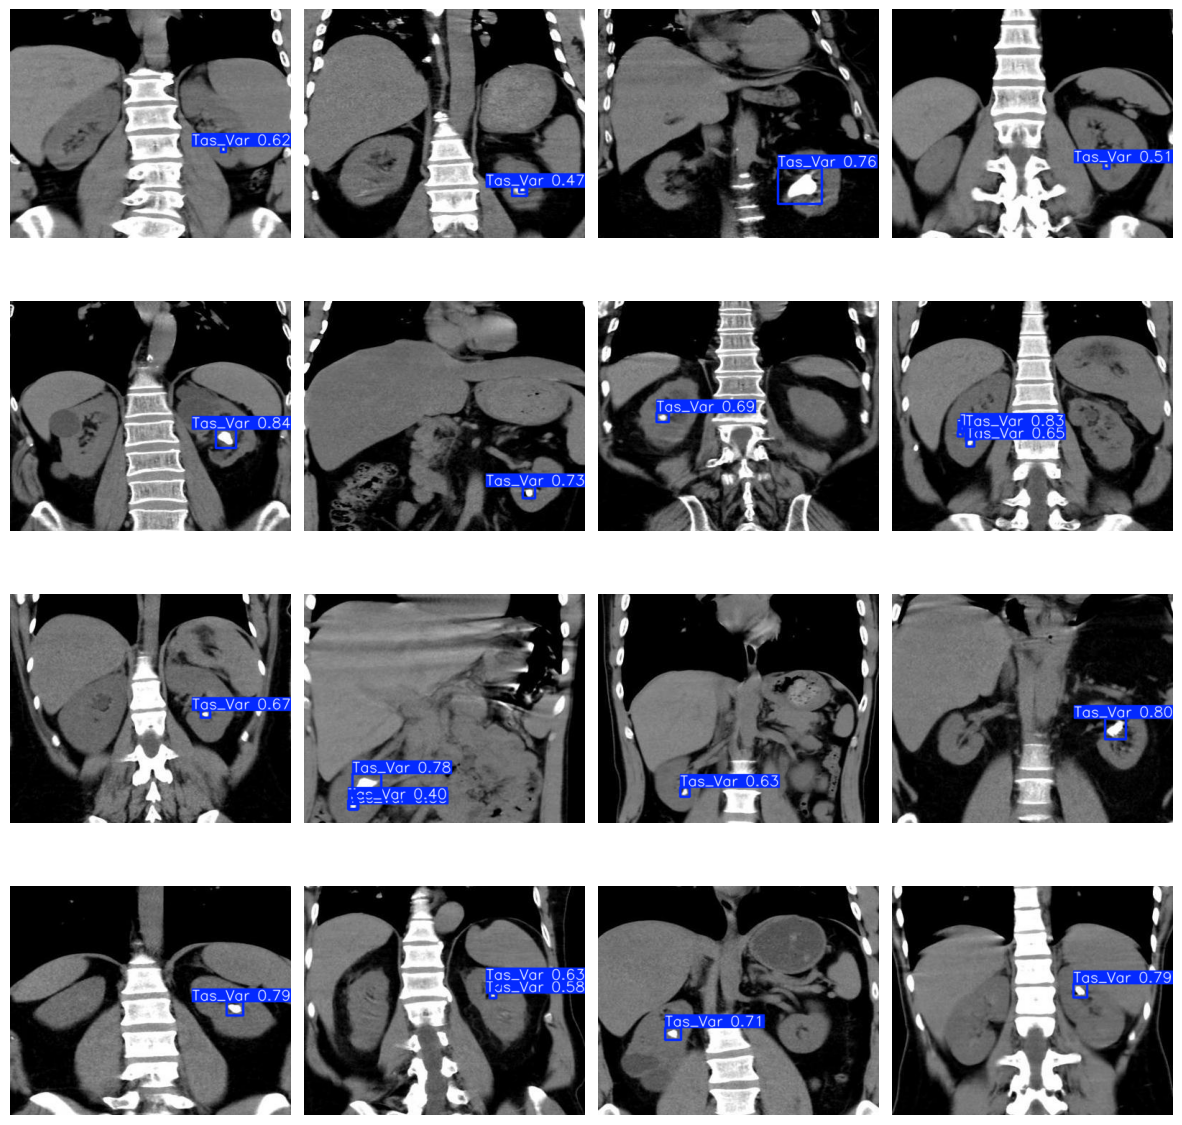

In [13]:
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(src_image_test, img_file)
    detect_img = kidneystone_detection(img_path, model_yolov8_trained)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [16]:
results = pd.read_csv('/content/KidneyStone_yolov8m/yolo_v8/results.csv') # need define directory
results #results.columns

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,48.0250,2.25126,2.73197,1.34759,0.59610,0.41231,0.42580,0.14525,2.32763,1.45149,1.34619,0.067500,0.000328,0.000328
1,2,88.6387,2.11061,1.20220,1.27847,0.64995,0.56558,0.50264,0.15070,2.35245,1.56019,1.43984,0.034487,0.000649,0.000649
2,3,129.1020,2.09690,1.17872,1.29390,0.55827,0.55692,0.43841,0.14420,2.16398,1.56705,1.29520,0.001461,0.000956,0.000956
3,4,169.0020,2.10737,1.18648,1.31737,0.74637,0.62154,0.65114,0.24322,1.99539,1.11622,1.23551,0.000941,0.000941,0.000941
4,5,208.5300,2.07128,1.13822,1.27060,0.68925,0.61423,0.61740,0.23538,2.04155,1.04521,1.24390,0.000921,0.000921,0.000921
5,6,251.1980,2.06077,1.10391,1.29721,0.66697,0.60615,0.59580,0.23013,2.00671,1.13856,1.22788,0.000901,0.000901,0.000901
6,7,291.1580,2.05599,1.08002,1.28045,0.71783,0.67317,0.65394,0.24666,1.99960,1.09114,1.19363,0.000881,0.000881,0.000881
7,8,334.6710,2.02466,1.06780,1.27482,0.66566,0.62486,0.63567,0.24836,2.10520,1.00192,1.23508,0.000861,0.000861,0.000861
8,9,374.5000,2.01585,1.04254,1.25371,0.75616,0.67385,0.68741,0.26669,1.98616,1.01954,1.19283,0.000842,0.000842,0.000842
9,10,418.4880,1.99335,1.02582,1.24242,0.71773,0.57895,0.64073,0.24032,1.97613,1.13062,1.16478,0.000822,0.000822,0.000822


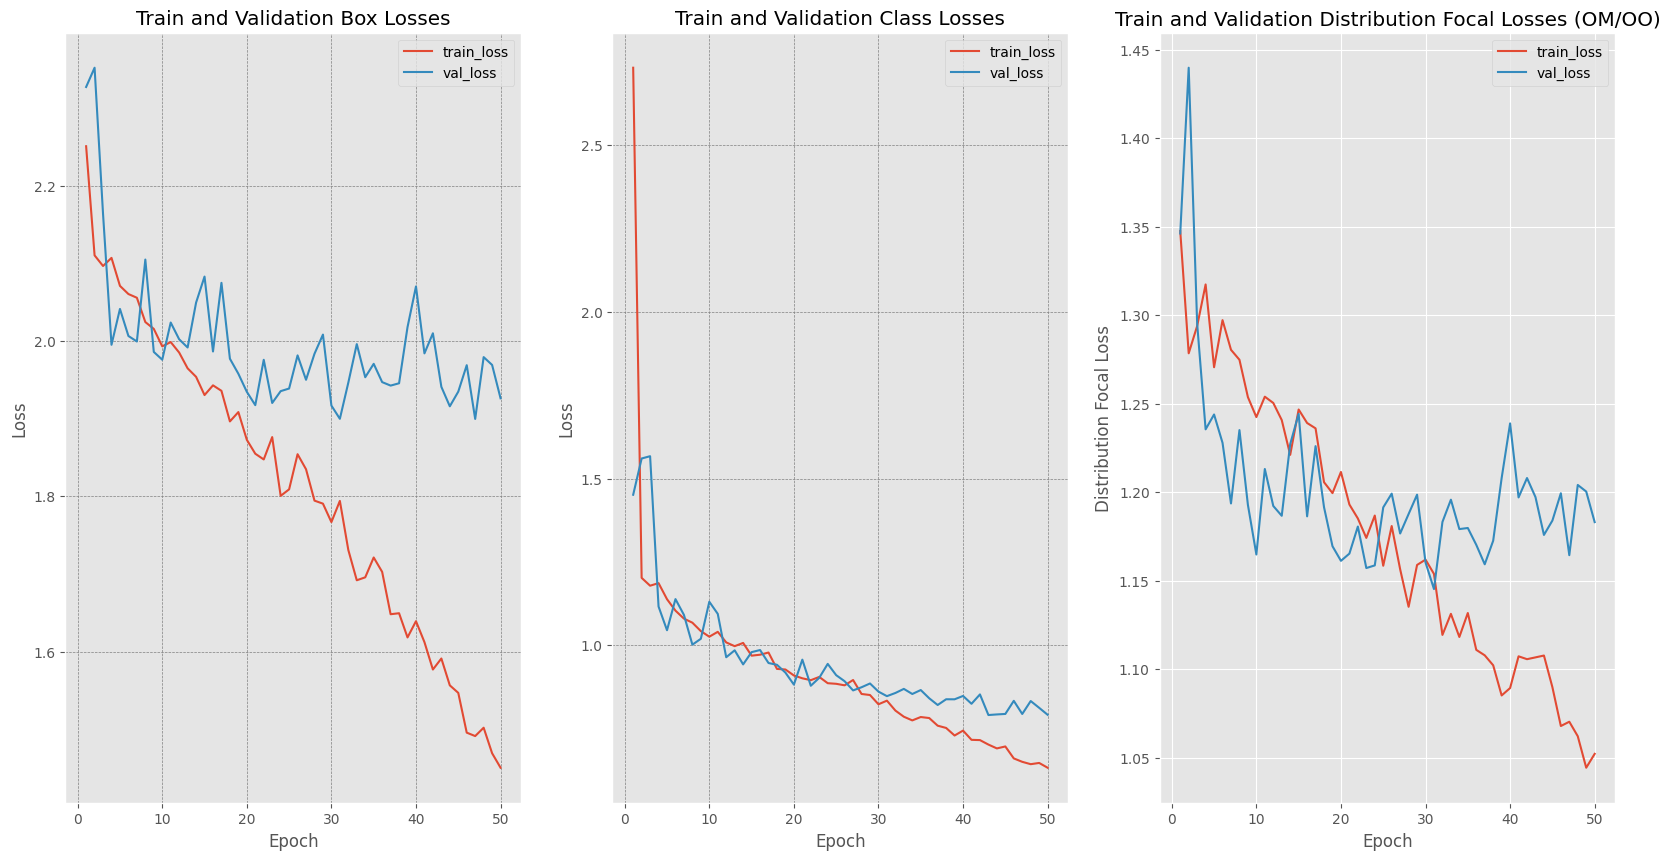

In [17]:
show_train_and_validation_graphs(results)

(-0.5, 2399.5, 1199.5, -0.5)

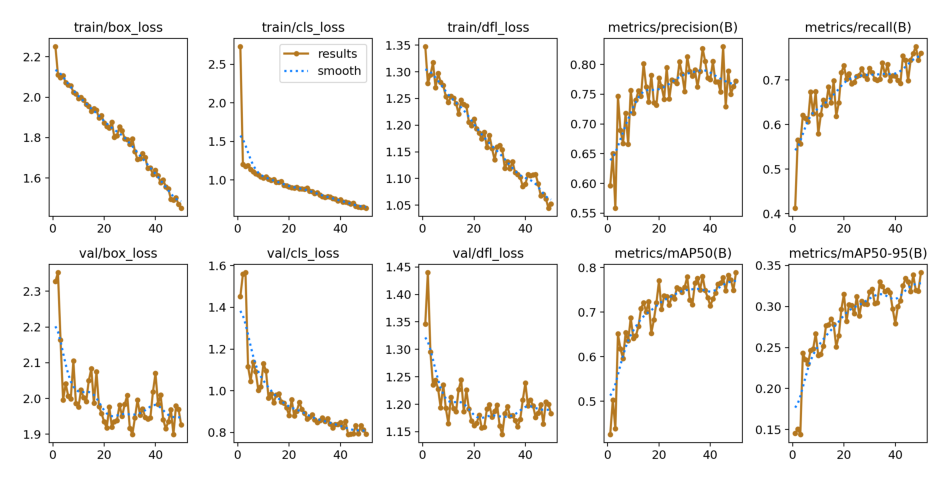

In [18]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/content/KidneyStone_yolov8m/yolo_v8/results.png'))
plt.axis('off')

(-0.5, 2249.5, 1499.5, -0.5)

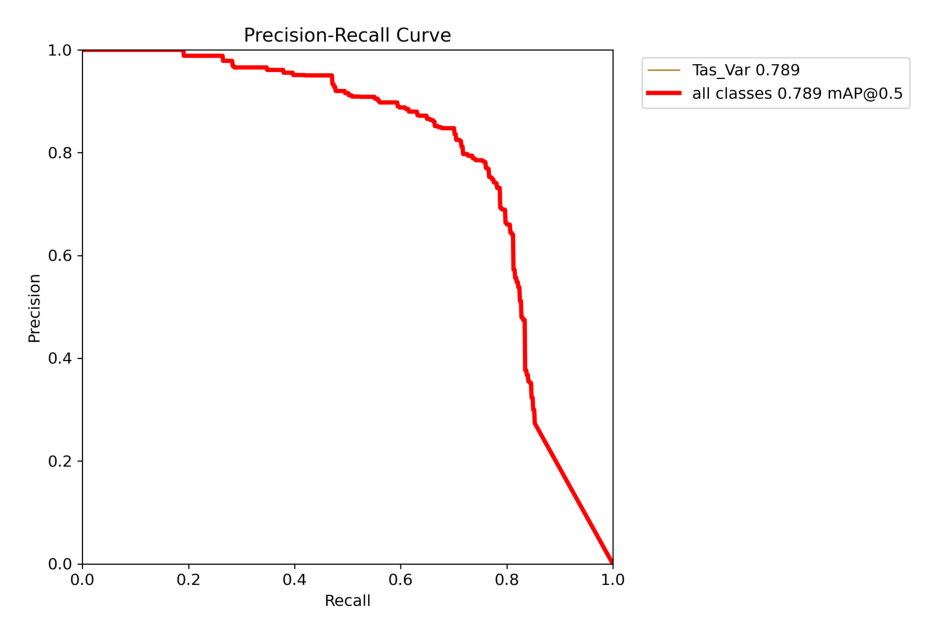

In [19]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/content/KidneyStone_yolov8m/yolo_v8/PR_curve.png')) #need define directory
plt.axis('off')

In [20]:
# this need to be act as parameter input when run on deploy mode
single_image = src_image_valid + '/1-3-46-670589-33-1-63737661477473189500001-5463064330587912766_png_jpg.rf.72d5fd49b7ea305b3167bb1d7ac8dbc7.jpg' #need check directory

In [21]:
y = model_yolov8_trained.predict(single_image)

print(type(y))


image 1/1 /content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/valid/images/1-3-46-670589-33-1-63737661477473189500001-5463064330587912766_png_jpg.rf.72d5fd49b7ea305b3167bb1d7ac8dbc7.jpg: 544x640 1 Tas_Var, 35.3ms
Speed: 3.9ms preprocess, 35.3ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)
<class 'list'>



0: 544x640 1 Tas_Var, 35.1ms
Speed: 3.1ms preprocess, 35.1ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


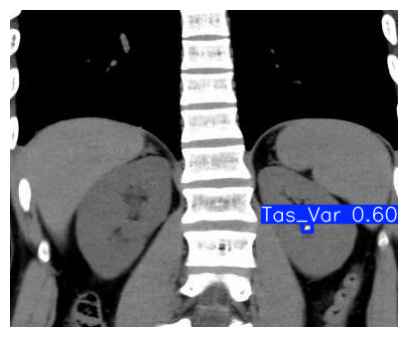

In [22]:
show_single_image(single_image, model_yolov8_trained)

In [23]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!zip -r /content/KidneyStone_yolov8m.zip /content/KidneyStone_yolov8m

  adding: content/KidneyStone_yolov8m/ (stored 0%)
  adding: content/KidneyStone_yolov8m/yolo_v8/ (stored 0%)
  adding: content/KidneyStone_yolov8m/yolo_v8/val_batch0_pred.jpg (deflated 10%)
  adding: content/KidneyStone_yolov8m/yolo_v8/train_batch2640.jpg (deflated 11%)
  adding: content/KidneyStone_yolov8m/yolo_v8/events.out.tfevents.1734075036.819d2dc539cd.1134.0 (deflated 91%)
  adding: content/KidneyStone_yolov8m/yolo_v8/P_curve.png (deflated 18%)
  adding: content/KidneyStone_yolov8m/yolo_v8/results.png (deflated 7%)
  adding: content/KidneyStone_yolov8m/yolo_v8/val_batch1_pred.jpg (deflated 8%)
  adding: content/KidneyStone_yolov8m/yolo_v8/train_batch2.jpg (deflated 6%)
  adding: content/KidneyStone_yolov8m/yolo_v8/weights/ (stored 0%)
  adding: content/KidneyStone_yolov8m/yolo_v8/weights/last.pt (deflated 8%)
  adding: content/KidneyStone_yolov8m/yolo_v8/weights/best.pt (deflated 8%)
  adding: content/KidneyStone_yolov8m/yolo_v8/args.yaml (deflated 51%)
  adding: content/Kidney